# 1. Information

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# 2. Fetching Data:

## 2.1 Import packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
pd.set_option('display.max_columns', 35)
warnings.filterwarnings('ignore')

## 2.2 Import data

In [2]:
data=pd.read_csv("hw3_logreg_data.csv")
data= data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.drop(['id'], axis = 1)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

# 3. Data Cleaning

In [3]:
data.isnull().sum()/len(data)

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [4]:
# perimeter_se
idxMax_perimeter_se=data[data['perimeter_se'].gt(9.7)].index
data_new=data.drop(idxMax_perimeter_se, axis=0)
# area_se
idxMax_area_se=data_new[data['area_se'].gt(178)].index
data_new=data_new.drop(idxMax_area_se, axis=0)
# concavity_se 
idxMax_concavity_se=data_new[data['concavity_se'].gt(0.123)].index
data_new=data_new.drop(idxMax_concavity_se, axis=0)
data=data_new

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                555 non-null    object 
 1   radius_mean              555 non-null    float64
 2   texture_mean             555 non-null    float64
 3   perimeter_mean           555 non-null    float64
 4   area_mean                555 non-null    float64
 5   smoothness_mean          555 non-null    float64
 6   compactness_mean         555 non-null    float64
 7   concavity_mean           555 non-null    float64
 8   concave points_mean      555 non-null    float64
 9   symmetry_mean            555 non-null    float64
 10  fractal_dimension_mean   555 non-null    float64
 11  radius_se                555 non-null    float64
 12  texture_se               555 non-null    float64
 13  perimeter_se             555 non-null    float64
 14  area_se                  5

# 4. Summary

In [6]:
data.describe(percentiles = [0.1, 0.25, 0.75, 0.95, 0.99])

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   555.000000    555.000000      555.000000   555.000000   
mean     14.009025     19.237658       91.098432   640.272973   
std       3.352666      4.292066       23.060345   324.455993   
min       6.981000      9.710000       43.790000   143.500000   
10%      10.272000     14.064000       65.990000   322.640000   
25%      11.695000     16.155000       75.100000   420.050000   
50%      13.280000     18.800000       85.980000   545.200000   
75%      15.705000     21.750000      103.050000   759.950000   
95%      20.370000     27.150000      134.490000  1288.600000   
99%      23.279200     30.269000      154.236000  1685.460000   
max      27.220000     39.280000      182.100000  2250.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       555.000000        555.000000      555.000000           555.000000   
mean          0.096136          0.102282        0.084008             0.047345   
std           0.013922          0.050652        0.072848             0.037207   
min           0.052630          0.019380        0.000000             0.000000   
10%           0.079642          0.049132        0.013520             0.011126   
25%           0.085985          0.063735        0.028860             0.020125   
50%           0.095790          0.090970        0.059280             0.032640   
75%           0.105000          0.129500        0.120400             0.069300   
95%           0.118600          0.201220        0.227600             0.123850   
99%           0.130572          0.261694        0.318090             0.153932   
max           0.163400          0.345400        0.375400             0.191300   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     555.000000              555.000000  555.000000  555.000000   
mean        0.180567                0.062641    0.386172    1.202273   
std         0.026655                0.006766    0.222952    0.535875   
min         0.106000                0.049960    0.114400    0.360200   
10%         0.149540                0.055380    0.182640    0.635400   
25%         0.161900                0.057800    0.231650    0.829300   
50%         0.179200                0.061490    0.316300    1.083000   
75%         0.195300                0.066005    0.467750    1.463500   
95%         0.225130                0.074300    0.855060    2.142500   
99%         0.258096                0.082513    1.102360    2.889960   
max         0.304000                0.097440    1.370000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    555.000000  555.000000     555.000000      555.000000    555.000000   
mean       2.718030   36.864450       0.006952        0.024523      0.029509   
std        1.577402   30.965038       0.002736        0.016440      0.020998   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
10%        1.271000   13.140000       0.004212        0.009134      0.007571   
25%        1.596500   17.830000       0.005145        0.012885      0.014630   
50%        2.257000   24.200000       0.006356        0.020150      0.025260   
75%        3.262500   43.815000       0.008091        0.031770      0.040110   
95%        6.058500  104.930000       0.012234        0.055992      0.069644   
99%        8.497200  153.238000       0.015921        0.078349      0.099562   
max        9.424000  176.500000       0.021770        0.135400      0.119700   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         555.000000   555.000000            555.000000    555.000000   
mean            0.011419     0.020342              0.003662     16.104881   
std             0.005461     0.008046              0.002284      4.588715   
min             0.000000     0.007882              0.000895      7.930000   
10%             0.005432     0.012996     

# 5. EDA

## 5.1. Distribution

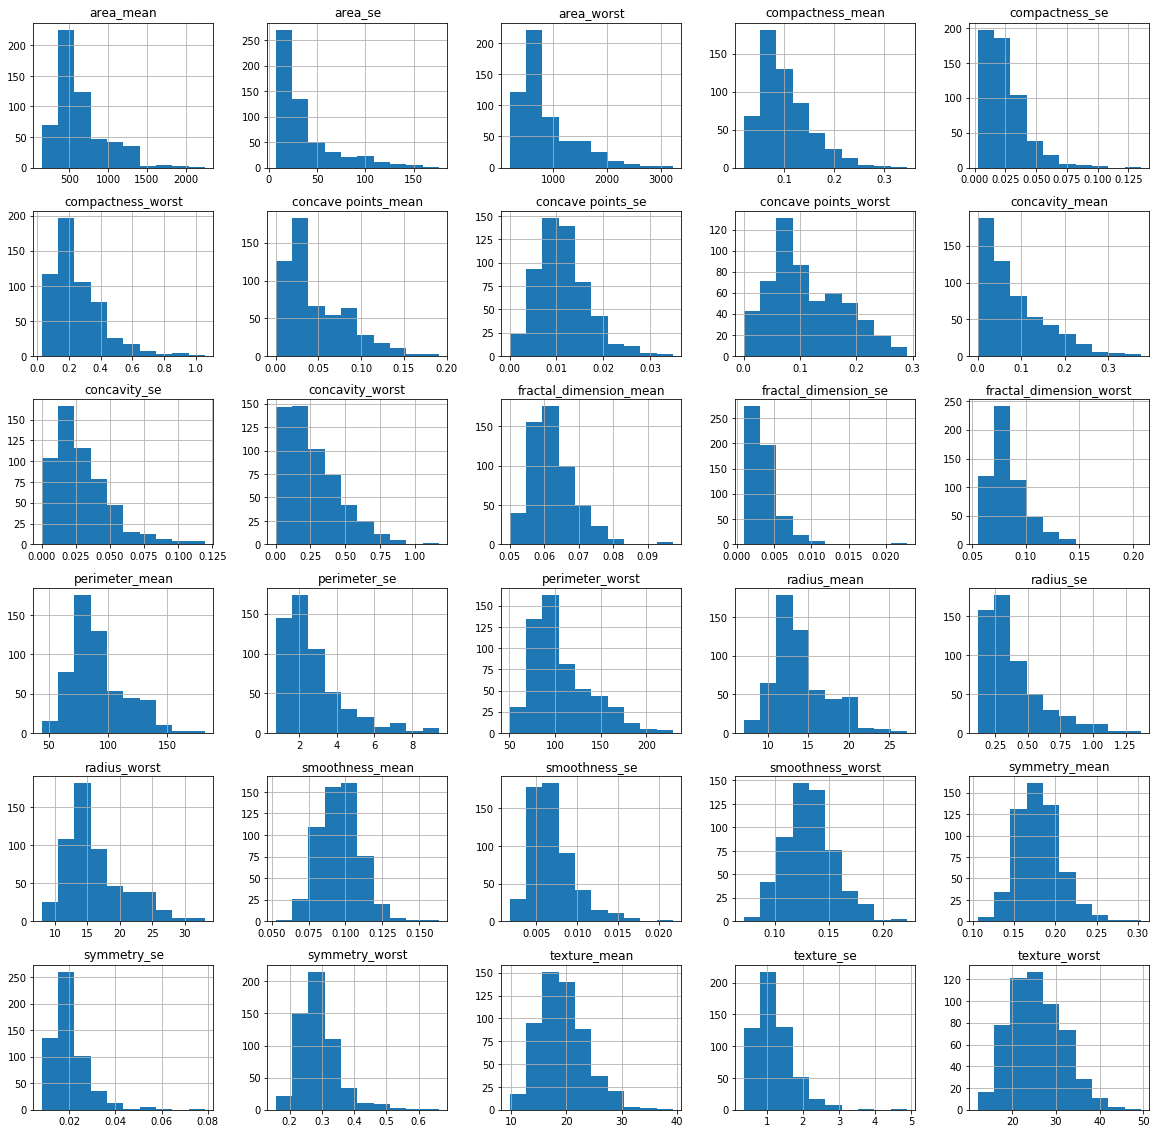

In [7]:
data.hist(figsize=(20, 20));

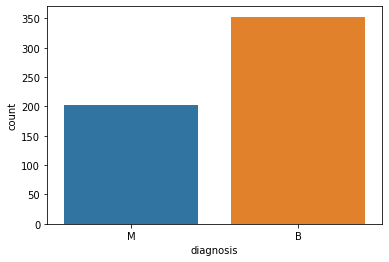

In [8]:
sns.countplot(x='diagnosis',data=data);

## 5.2 Correlation

radius_mean perimeter_mean 0.9979100423996932
radius_mean area_mean 0.9903321326158313
radius_mean radius_worst 0.9724819217602904
radius_mean perimeter_worst 0.9670445483237908
radius_mean area_worst 0.9508173221755369
texture_mean texture_worst 0.913858842687863
perimeter_mean radius_mean 0.9979100423996932
compactness_mean concavity_mean 0.8918554950681025
compactness_mean compactness_worst 0.8761417046995101
concavity_mean compactness_mean 0.8918554950681025
concavity_mean concave points_mean 0.9375251872998431
concavity_mean concavity_worst 0.894707012796709
concavity_mean concave points_worst 0.8856930737736285
radius_se perimeter_se 0.9668683319064226
radius_se area_se 0.9551445400772993
perimeter_se radius_se 0.9668683319064226
compactness_se concavity_se 0.8685992682185322
concavity_se compactness_se 0.8685992682185322
texture_worst texture_mean 0.913858842687863


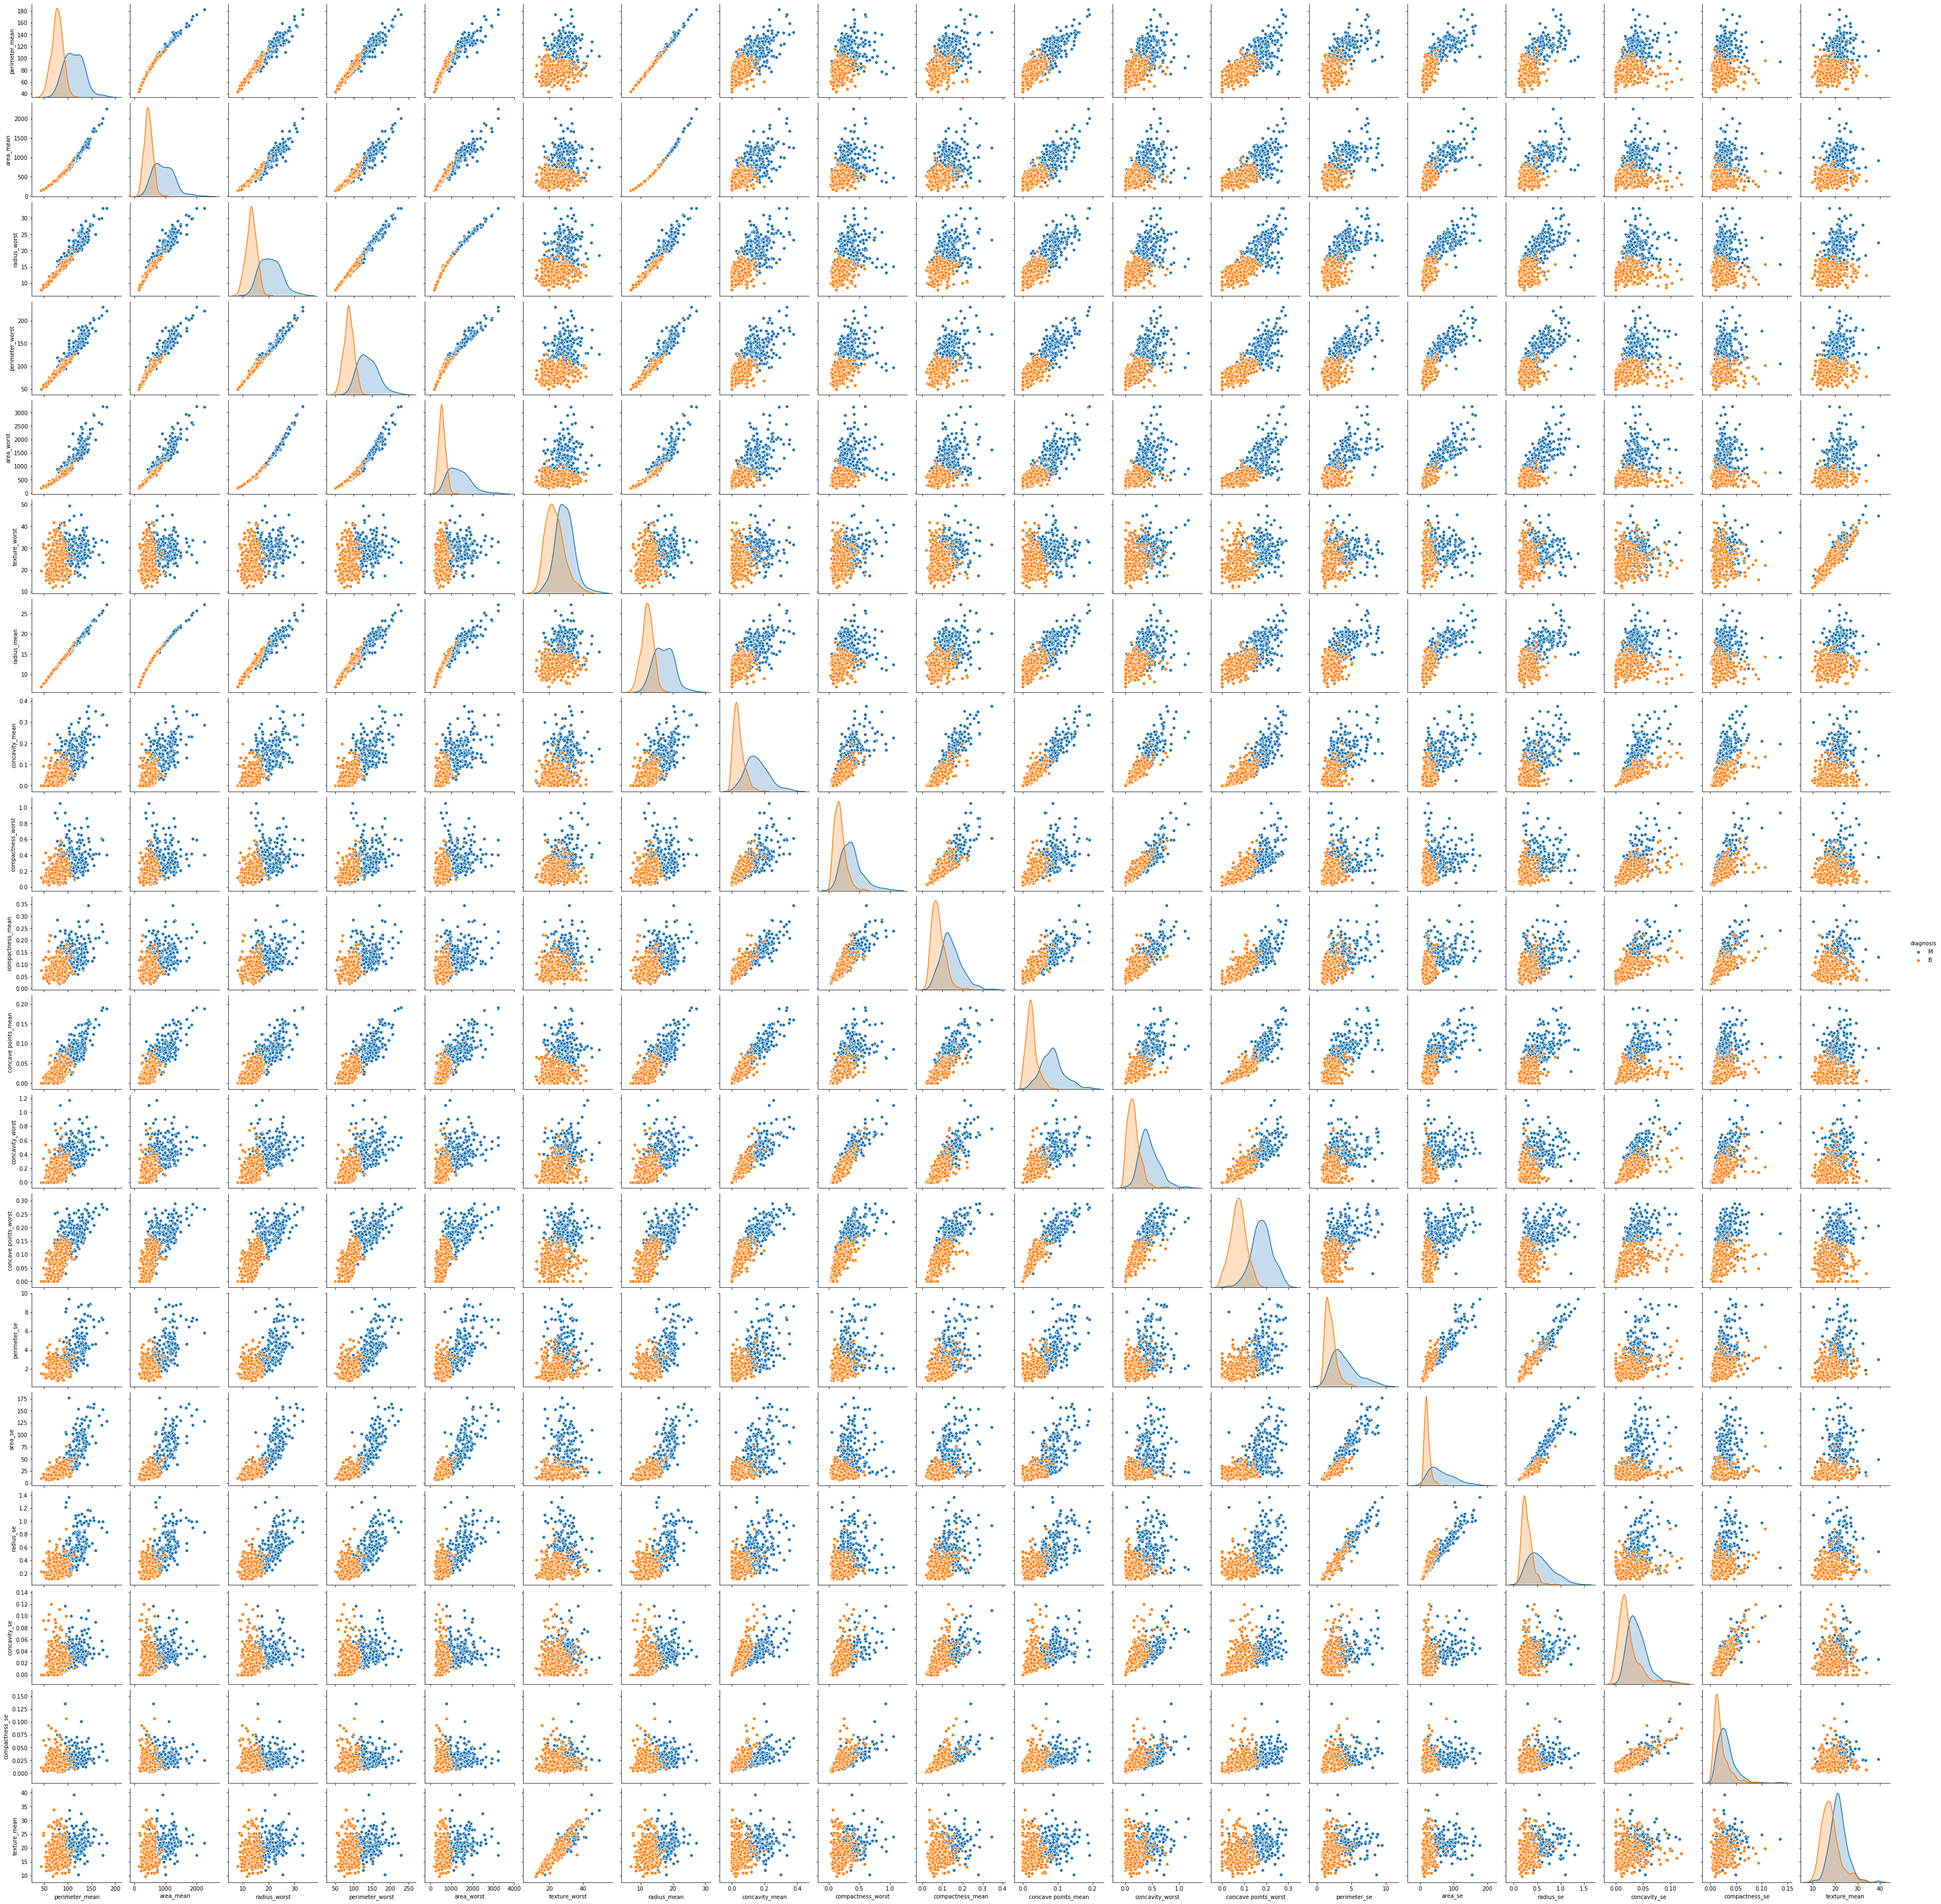

In [9]:
Corr = data.corr().abs()
#  Find pairs of signs with a correlation greater than 0.85
CorFullField = []
for i in Corr:
    for j in Corr.index[Corr[i] > 0.85]:
        if i != j and j not in CorFullField:# and i not in CorField:
            CorFullField.append(j)
            print (i, j, Corr[i][Corr.index == j].values[0])
CorFullField.append('diagnosis')
sns.pairplot(data=data[CorFullField], hue='diagnosis')

(19.5, -0.5)

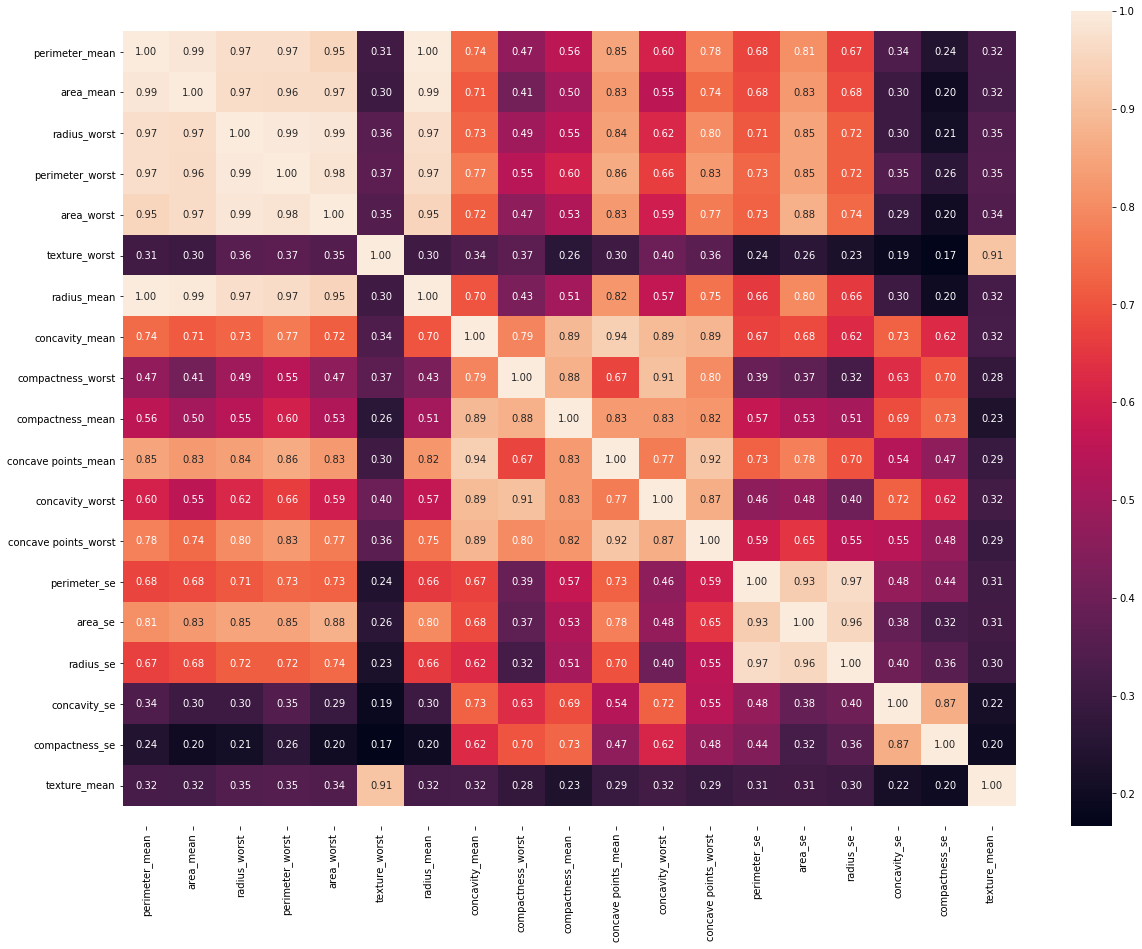

In [10]:
# Draw small HeatMap
Corr =  data[CorFullField].dropna().corr()
plt.figure(figsize=(20,15));
ax=sns.heatmap(Corr, annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [11]:
Corr = data.corr().abs()
#  Find pairs of signs with a correlation greater than 0.85
CorField = []
for i in Corr:
    for j in Corr.index[Corr[i] > 0.85]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, Corr[i][Corr.index == j].values[0])
print('The number of strongly correlated features of the sample = ', len(CorField))

radius_mean perimeter_mean 0.9979100423996932
radius_mean area_mean 0.9903321326158313
radius_mean radius_worst 0.9724819217602904
radius_mean perimeter_worst 0.9670445483237908
radius_mean area_worst 0.9508173221755369
texture_mean texture_worst 0.913858842687863
compactness_mean concavity_mean 0.8918554950681025
compactness_mean compactness_worst 0.8761417046995101
concave points_mean concave points_worst 0.9158717111430188
radius_se perimeter_se 0.9668683319064226
radius_se area_se 0.9551445400772993
compactness_se concavity_se 0.8685992682185322
The number of strongly correlated features of the sample =  12


In [12]:
# Droз strong correlated parameters
data=data.drop(CorField, axis = 1)
data.shape

(555, 19)

Выбрасываем признаки с корреляцией больше 0.85.

## 5.3 Target Distribution

In [13]:
dataNum=data.drop(['diagnosis'], axis = 1)
tarVar=data.diagnosis.to_frame()

In [14]:
# We scale our data so that they are of the same dimension
dataNorm = (dataNum - dataNum.mean()) / (dataNum.std()) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

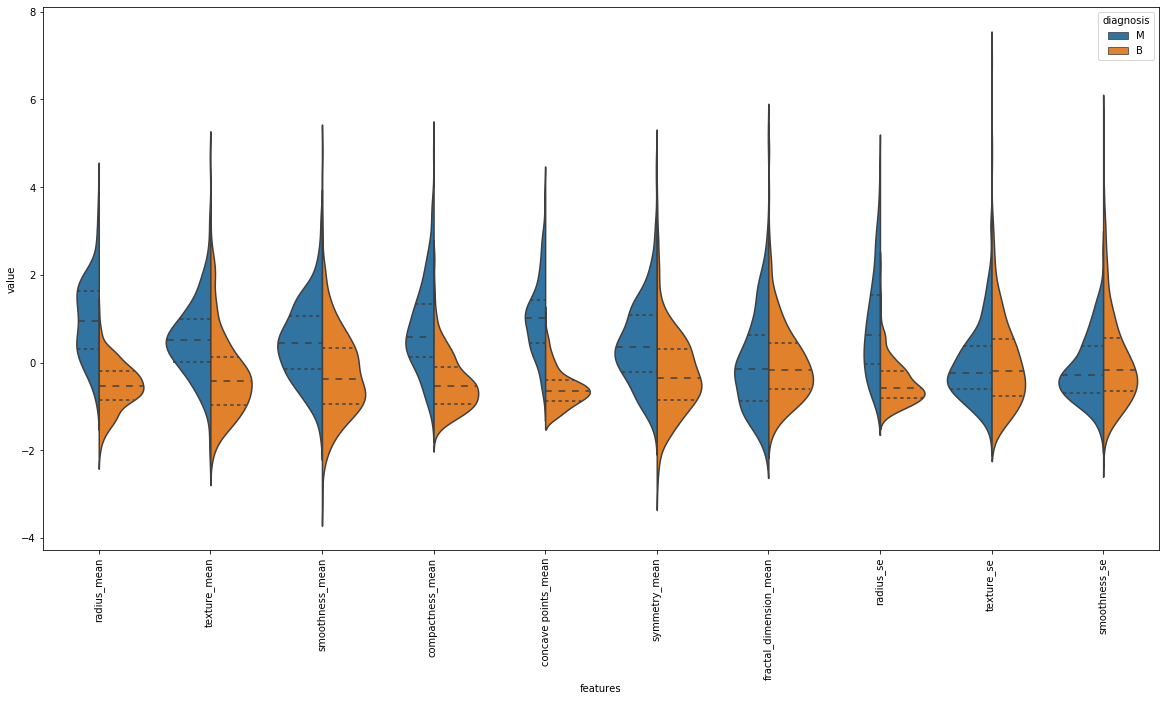

In [33]:
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,0: 10]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=dataVar,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

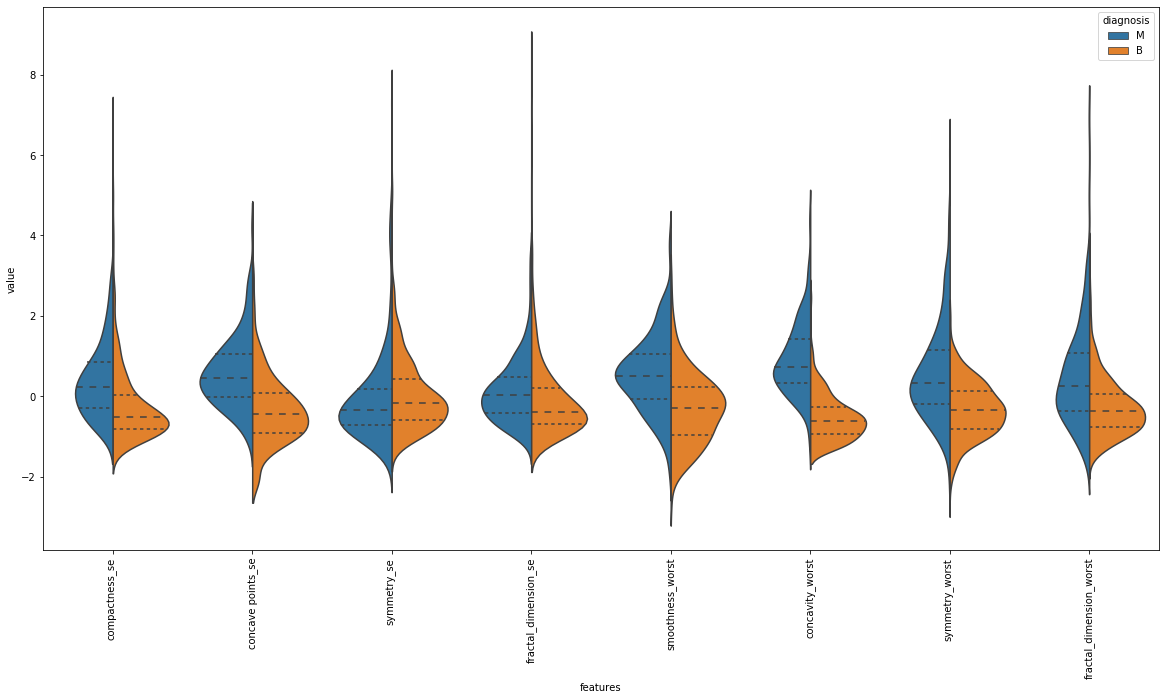

In [35]:
dataVar = pd.concat([tarVar.diagnosis,dataNorm.iloc[:,10: 22]],axis=1)
dataVar = pd.melt(dataVar,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=dataVar,split=True, inner="quart")
plt.xticks(rotation=90)

In [17]:
data=data.replace(to_replace ="M", value =0)
data=data.replace(to_replace ="B", value =1)

# 6. Model Building

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

## 6.1 Data Preprocessing

In [19]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), 
    data['diagnosis'], 
    test_size=0.30, 
    random_state=42, 
    stratify=data['diagnosis']
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6.2 Simple Logistic Regression Model

In [21]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.985
Precision: 0.996
Recall: 0.980
f1_score: 0.988

Test quality:
Accuracy: 0.988
Precision: 1.000
Recall: 0.981
f1_score: 0.991


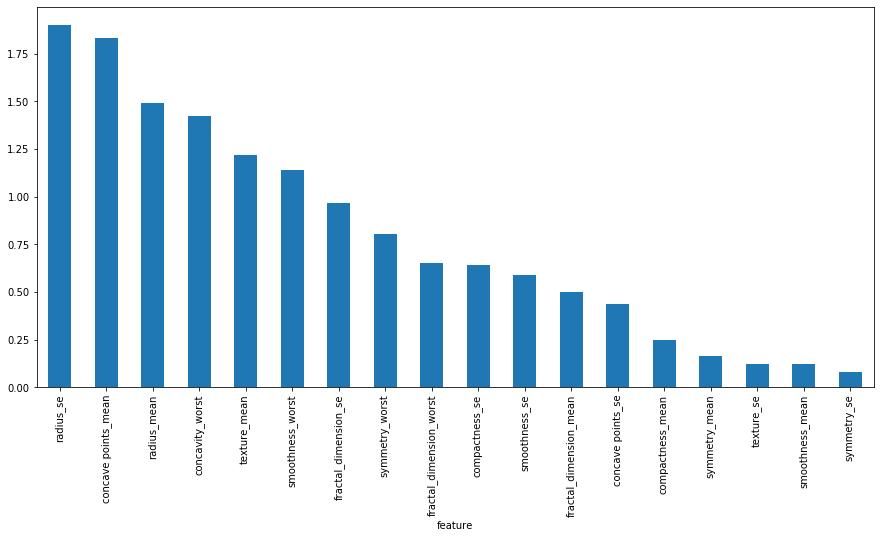

In [22]:
featureImportance = pd.DataFrame({"feature": data.drop('diagnosis',axis=1).columns, 
                                  "importance": np.absolute(log_reg.coef_[0])})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(15, 7));

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

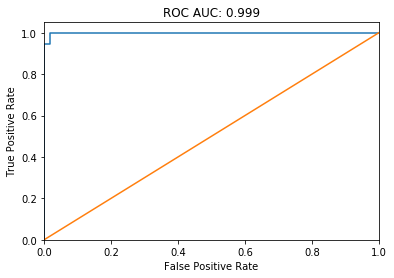

In [24]:
plot_roc_curve(log_reg.predict_proba(X_test_scaled)[:,1], y_test)

## 6.2 Logistic Regression Model with CV and Reguralization

In [25]:
log_reg_cv = LogisticRegressionCV(Cs=1000)
log_reg_cv.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg_cv.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg_cv.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.985
Precision: 0.996
Recall: 0.980
f1_score: 0.988

Test quality:
Accuracy: 0.988
Precision: 1.000
Recall: 0.981
f1_score: 0.991


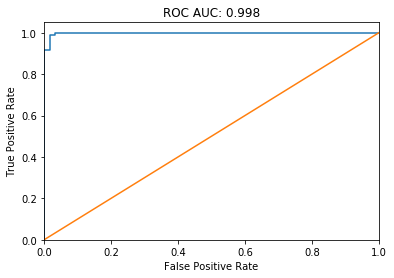

In [26]:
plot_roc_curve(log_reg_cv.predict_proba(X_test_scaled)[:,1], y_test)

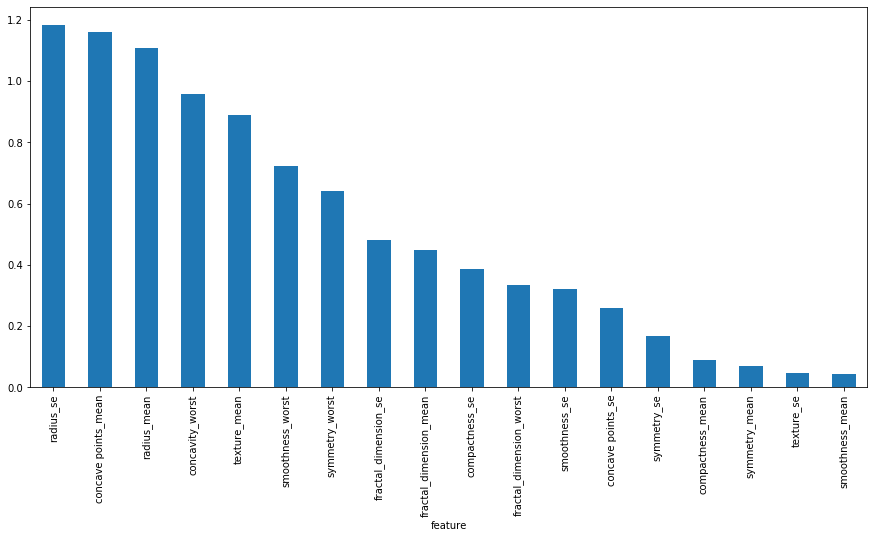

In [27]:
featureImportance = pd.DataFrame({"feature": data.drop('diagnosis',axis=1).columns, 
                                  "importance": np.absolute(log_reg_cv.coef_[0])})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(15, 7));

# 7 Conclusion

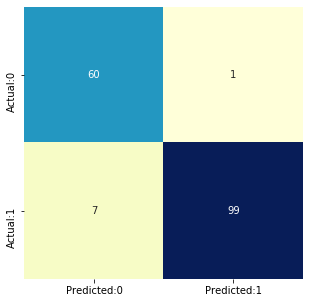

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_reg_cv.predict_proba(X_test_scaled)[:, 1]>0.8)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

* Хорошее обучение модели без регуляризации можно объяснить высокой однородностью данных и хорошим шкалированием.
* Поскольку регуляризация вносит дополнительные ограничения (штрафы) при обучении, модель регрессии без регуляризации показала результат чуть лучший по критерию ROC-AUC.
* Веса, которые получили параметры в результате обучения, подтверждаются диаграммами распределения с учетом цецелевой переменой.